# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ You are strongly advised to:
* 💾 download the solution for yesterday's optional `distance_seller_customer` function if you didn't have time to code it
* 👥 copy-paste it into your `olist/orders.py` file



👇 First things first, import the `orders` dataset

In [3]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix down below 👇, we can notice that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other features constant**.

<AxesSubplot:>

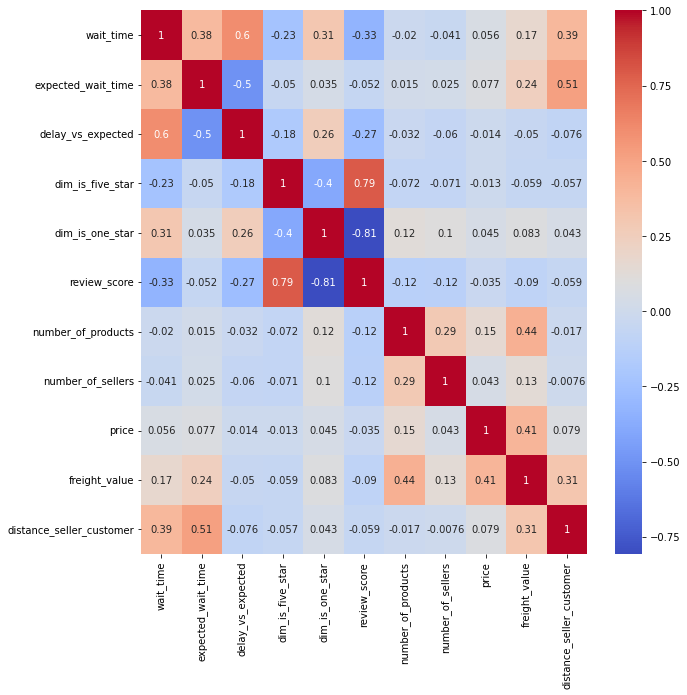

In [4]:
plt.figure(figsize = (10,10))

sns.heatmap(orders.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric `R-squared`, as well as `individual regression coefficients`, `t-values`, `p-values`, and `95% confidence intervals`

***Model 1***:

In [5]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula = "review_score ~ wait_time", data = orders)

model1 = model1.fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        12:36:00   Log-Likelihood:            -1.5442e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7020      0.006    742.206      0.000       4.690       4.714
wait_time     -0.0454      0.000   -109.678      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19550.021   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35437.440
Skew:                          -1.301   Prob(JB):                         0.00
Kurtosis:                       4.451   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [6]:
model2 = smf.ols(formula = "review_score ~ delay_vs_expected", data = orders)

model2 = model2.fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     7363.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        12:36:03   Log-Likelihood:            -1.5654e+05
No. Observations:               95872   AIC:                         3.131e+05
Df Residuals:                   95870   BIC:                         3.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.7509      0.006    606.581      0.000       3.739       3.763
delay_vs_expected    -0.0339      0.000    -85.806      0.000      -0.035      -0.033
==============================================================================
Omnibus:                    19682.076   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34366.776
Skew:                          -1.367   Prob(JB):                         0.00
Kurtosis:                       4.061   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

***Model 3***:

In [7]:
model3 = smf.ols(formula = "review_score ~ wait_time + delay_vs_expected", data = orders)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     6437.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        12:36:08   Log-Likelihood:            -1.5405e+05
No. Observations:               95872   AIC:                         3.081e+05
Df Residuals:                   95869   BIC:                         3.081e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.4423      0.011    390.035      0.000       4.420       4.465
wait_time            -0.0369      0.001    -71.539      0.000      -0.038      -0.036
delay_vs_expected    -0.0132      0.000    -27.390      0.000      -0.014      -0.012
==============================================================================
Omnibus:                    19873.561   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37516.886
Skew:                          -1.288   Prob(JB):                         0.00
Kurtosis:                       4.661   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
👉 Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **`partial correlation coefficients`**. 

❓Can you notice the difference with the **simple regression** coeffients computed with *seaborn* above? 

❓What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


> YOUR ANSWER HERE:
the coefficients decrease when the two features are combined
the relative slopes for wait time and delay vs expected is lesser than the simple slope

<details>
    <summary>- 💡 Solution 💡-</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. 

✅ Let's try to add more features to our regression to improve the explainability of the linear regression.

👉 Create a new OLS `model4` with more features from the `orders` dataset.
- ⚠️ Do not create **data leaks**: do not add features that are directly derived from the `review_score`
- ⚠️ Do not add two features perfectly colinear with each other
- ⚖️  Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ won't be in the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

📝 <u>Note</u>: a **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because in this model, we want to minimise the **`MSE Mean Squared Errors`**

***Model 4***:

❓ What features would you like to consider ?

In [8]:
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,-8.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,-6.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,-18.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,-13.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,-10.0,delivered,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,-11.0,delivered,1,0,5,1,1,72.00,13.08,69.481037
95876,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,-2.0,delivered,0,0,4,1,1,174.90,20.10,474.098245
95877,83c1379a015df1e13d02aae0204711ab,24.0,30.0,-6.0,delivered,1,0,5,1,1,205.99,65.02,968.051192
95878,11c177c8e97725db2631073c19f07b62,17.0,37.0,-21.0,delivered,0,0,2,2,1,359.98,81.18,370.146853


⚖️ Standardize your features.

*Do you remember why we need to perform this operation before running a `Multivariate regression` ?*

<details>
    <summary>- 💡 Answer 💡-</summary>

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others 
    
    *Ex: if you have a feature "number of bedrooms" from 1 to 5 and a feature "surface" from 20 to 200 sqm, the ranges of these two features are quite different...*

📅 When we will discover Machine Learning Algorithms, we will also need to perform some scaling operations before trying to predict any target.

In [24]:
orders["wait_time1"] = (orders["wait_time"] - orders["wait_time"].mean())/orders["wait_time"].std()
orders["delay_vs_expected1"] = (orders["delay_vs_expected"] - orders["delay_vs_expected"].mean())/orders["delay_vs_expected"].std()
orders["price1"] = (orders["price"] - orders["price"].mean())/orders["price"].std()
orders["distance_seller_customer1"] = (orders["distance_seller_customer"] - orders["distance_seller_customer"].mean())/orders["distance_seller_customer"].std()
orders["number_of_products1"] = (orders["number_of_products"] - orders["number_of_products"].mean())/orders["number_of_products"].std()
orders["number_of_sellers1"] = (orders["number_of_sellers"] - orders["number_of_sellers"].mean())/orders["number_of_sellers"].std()
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer,wait_time1,delay_vs_expected1,price1,distance_seller_customer1,number_of_products1,number_of_sellers1
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,-8.0,delivered,0,0,4,1,1,29.99,8.72,18.063837,-0.428002,0.387964,-0.513802,-0.979475,-0.264595,-0.112544
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,-6.0,delivered,0,0,4,1,1,118.70,22.76,856.292580,0.100519,0.585732,-0.086640,0.429743,-0.264595,-0.112544
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,-18.0,delivered,1,0,5,1,1,159.90,19.22,514.130333,-0.322297,-0.600877,0.111748,-0.145495,-0.264595,-0.112544
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,-13.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366,0.100519,-0.106457,-0.441525,2.054621,-0.264595,-0.112544
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,-10.0,delivered,1,0,5,1,1,19.90,8.72,30.174037,-1.062226,0.190196,-0.562388,-0.959115,-0.264595,-0.112544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,-11.0,delivered,1,0,5,1,1,72.00,13.08,69.481037,-0.428002,0.091311,-0.311513,-0.893033,-0.264595,-0.112544
95876,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,-2.0,delivered,0,0,4,1,1,174.90,20.10,474.098245,1.051855,0.981268,0.183977,-0.212797,-0.264595,-0.112544
95877,83c1379a015df1e13d02aae0204711ab,24.0,30.0,-6.0,delivered,1,0,5,1,1,205.99,65.02,968.051192,1.263263,0.585732,0.333684,0.617630,-0.264595,-0.112544
95878,11c177c8e97725db2631073c19f07b62,17.0,37.0,-21.0,delivered,0,0,2,2,1,359.98,81.18,370.146853,0.523335,-0.897530,1.075186,-0.387558,1.601605,-0.112544


👉 Create your `model4` and train it.

In [33]:
model4 = smf.ols(formula = "review_score ~ wait_time1 + delay_vs_expected1 + price1 + distance_seller_customer1 + number_of_products1 + number_of_sellers1", data = orders)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2776.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        13:00:47   Log-Likelihood:            -1.5241e+05
No. Observations:               95872   AIC:                         3.048e+05
Df Residuals:                   95865   BIC:                         3.049e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.1555      0.004   1084.675      0.000       4.148       4.163
wait_time1                   -0.3975      0.006    -69.064      0.000      -0.409      -0.386
delay_vs_expected1           -0.1113      0.005    -20.964      0.000      -0.122      -0.101
price1                       -0.0038      0.004     -0.967      0.334      -0.011       0.004
distance_seller_customer1     0.0695      0.005     15.062      0.000       0.060       0.079
number_of_products1          -0.1291      0.004    -31.895      0.000      -0.137      -0.121
number_of_sellers1           -0.1353      0.004    -33.754      0.000      -0.143      -0.127
==============================================================================
Omnibus:                    18643.258   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35842.583
Skew:                          -1.195   Prob(JB):                         0.00
Kurtosis:                       4.804   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [45]:
model4.params

Intercept                    4.155509
wait_time1                  -0.397528
delay_vs_expected1          -0.111266
price1                      -0.003764
distance_seller_customer1    0.069510
number_of_products1         -0.129111
number_of_sellers1          -0.135262
dtype: float64

<AxesSubplot:>

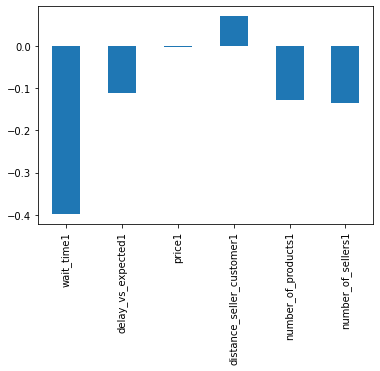

In [48]:
model4.params[1:].plot(kind = "bar")

<details>
    <summary>- 💡Explanations 💡 -</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of `review_score` lies outside of the orders dataset.

⚠️ Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

⚠️ Regression performance should not be measured only by its R-squared!  

👀 Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals.

You should see that the mean of the residuals is equal to 0 (always verified in a linear regression context)

In [84]:
predicted_review_score = model4.predict(orders)
predicted_review_score
residuals = predicted_review_score - orders["review_score"]
residuals.mean()

3.0907778932274916e-14

🧮 Compute the associated RMSE. 

In [85]:
rmse = residuals.std()
rmse

1.1861971014513781

📊 Plot the `residuals` in a histogram.

<AxesSubplot:ylabel='Count'>

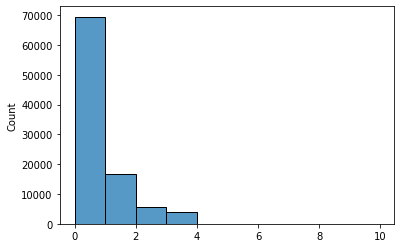

In [99]:
sns.histplot(abs(residuals), bins = 10)

❓ Can you guess why the residual distplot has such a strange shape? 

*Hint:*<br/>
👉 Plot, on the same graph, both the distribution of the `review_score` and the distribution of the`predicted_review_score`.

<AxesSubplot:xlabel='review_score', ylabel='Count'>

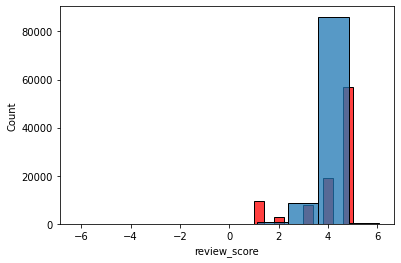

In [98]:
sns.histplot(orders["review_score"], color = "red", bins = 10)
sns.histplot(predicted_review_score, bins = 10)

📈 Actually, using `seaborn`, we could have already plote a `regression line` of the `review_score` vs. the `delay_vs_expected`

Do it once with a sub-`sample` of the population, and once with the `entire population`.

<AxesSubplot:xlabel='delay_vs_expected', ylabel='review_score'>

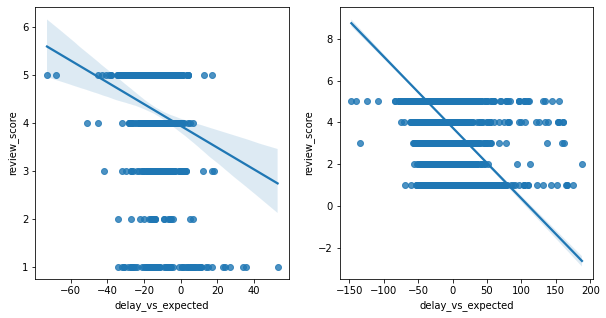

In [101]:
orders1 = orders.sample(1000, random_state = 42)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.regplot(x = "delay_vs_expected", y = "review_score", data = orders1)
plt.subplot(1,2,2)
sns.regplot(x = "delay_vs_expected", y = "review_score", data = orders)

☝️ You can see that it is hard to regress the `review_score` of an order vs. its `wait_time`. because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

📅 In the next session, you will discover a new model: the `Logistic Regression` which, despite its name, is a `Classification Algorithm` 

☝️ So in the end, our model is not so great, for two reasons:
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

💡 So instead on working on individual orders and trying to explain their discrete `rewiew_score` based on the `wait_time`, we will focus our analysis on the sellers' level, aggregating the orders by sellers in the next challenge.

🏁 Great job! 

💾 Don't forget to *save*, *commit* and *push* this notebook when you are done!